## Importação e Pré-Processamento

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



### Importação

In [2]:
# Read the CSV file
df_train = pd.read_csv('dados_trabalho1/conjunto_de_treinamento.csv')
# Read the test CSV file
df_test = pd.read_csv('dados_trabalho1/conjunto_de_teste.csv')


In [3]:
df_train.describe()

,id_solicitante,produto_solicitado,dia_vencimento,tipo_endereco,idade,estado_civil,qtde_dependentes,grau_instrucao,nacionalidade,tipo_residencia,...,valor_patrimonio_pessoal,possui_carro,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,19464.000000,...,2.000000e+04,20000.000000,20000.000000,16903.000000,17022.000000,8486.000000,7140.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,1.284350,13.147250,1.006350,42.352500,2.120850,0.666400,0.0,0.961600,1.261303,...,2.095614e+03,0.339050,0.008900,8.045081,2.533310,3.708107,0.288095,581.295250,581.295250,0.500000
std,5773.647028,1.008239,6.748507,0.079435,14.930177,1.332004,1.236725,0.0,0.202305,0.883580,...,4.403344e+04,0.473399,0.388881,3.210790,1.532765,5.181241,0.944339,227.369798,227.369798,0.500013
min,1.000000,1.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,105.000000,0.000000
25%,5000.750000,1.000000,10.000000,1.000000,31.000000,1.000000,0.000000,0.0,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,444.000000,444.000000,0.000000
50%,10000.500000,1.000000,10.000000,1.000000,40.000000,2.000000,0.000000,0.0,1.000000,1.000000,...,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,596.000000,596.000000,0.500000
75%,15000.250000,1.000000,20.000000,1.000000,52.000000,2.000000,1.000000,0.0,1.000000,1.000000,...,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,728.000000,728.000000,1.000000
max,20000.000000,7.000000,25.000000,2.000000,106.000000,7.000000,53.000000,0.0,2.000000,5.000000,...,6.000000e+06,1.000000,32.000000,17.000000,5.000000,17.000000,5.000000,999.000000,999.000000,1.000000


### Verificação manual de atributos

<!-- É interessante verificar manualmente quais colunas não podem influenciar a variável inadimplência, pois não faz sentido ... Isso evita que o modelo perca processamento com colunas que não influenciam a variável alvo. -->


In [4]:
df_train.columns

Index(['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_telefone_celular',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'meses_no_trabalho', 'profissao', 'ocupacao', 'profissao_companheiro',
       'grau_instrucao_companheiro', 'local_onde_reside',
       '

In [5]:
excluded_columns = ['id_solicitante' ]
df_train = df_train.drop(excluded_columns, axis=1)
df_test = df_test.drop(excluded_columns, axis=1)

### Codificação de atributos não numéricos


In [6]:

# Criar uma cópia dos dataframes originais
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()

# Identificar colunas do tipo String
string_columns = df_train.select_dtypes(include=['object']).columns

# Inicializar o LabelEncoder
le = LabelEncoder()

# Codificar colunas do tipo String no dataframe de treino
for col in string_columns:
    df_train_encoded[col] = le.fit_transform(df_train_encoded[col])

# Codificar colunas do tipo String no dataframe de teste
for col in string_columns:
    df_test_encoded[col] = le.fit_transform(df_test_encoded[col])



### Verificação de colunas e linhas com null / NaN

In [7]:
# Verificar quais colunas têm valores nulos
null_columns = df_train_encoded.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)


tipo_residencia                 536
meses_na_residencia            1450
profissao                      3097
ocupacao                       2978
profissao_companheiro         11514
grau_instrucao_companheiro    12860
dtype: int64


In [8]:
# Filtrar apenas as colunas não nulas
non_null_columns = df_train_encoded.dropna(axis=1).columns

# DataFrame sem colunas nulas
df_no_null_columns = df_train_encoded.drop(columns=null_columns.index)

# Criar um DataFrame sem linhas com valores nulos
null_columns_to_drop = ['profissao_companheiro','grau_instrucao_companheiro']
df_no_null_rows = df_train_encoded.drop(columns=null_columns_to_drop).dropna()


### Selecionar dataSet

In [82]:
usingData = df_no_null_rows
#usingTestData = df_test_no_null_rows

In [ ]:
print(f'Shape:\nTreino: {usingData.shape}\nTeste:{usingTestData.shape}\n É esperado que o treino tenha uma variável a mais (alvo)')

NameError: name 'usingTestData' is not defined

### Tratar Outliers

In [84]:
# Calcular o IQR para cada coluna
Q1 = usingData.quantile(0.25)
Q3 = usingData.quantile(0.75)
IQR = Q3 - Q1

# Filtrar os outliers (apenas para valores mais altos)
usingData = usingData[~((usingData > (Q3 + 1.5 * IQR))).any(axis=1)]



In [85]:
usingData['meses_no_trabalho']

9        0
17       0
30       0
61       0
67       0
        ..
19982    0
19983    0
19991    0
19993    0
19996    0
Name: meses_no_trabalho, Length: 3648, dtype: int64

### Discretizar valores float.


In [9]:
for colname in df_no_null_rows.select_dtypes("float"):
    df_no_null_rows[colname] = df_no_null_rows[colname].astype(int)


In [10]:
discrete_features = df_no_null_rows.dtypes == int
False in discrete_features

# Retorna False --> Todos os atributos sao discretos.

False

### MI Scores

In [11]:
# from sklearn.feature_selection import mutual_info_regression

# X = df_no_null_rows.drop('inadimplente', axis = 1)
# y = df_no_null_rows['inadimplente']

# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(df_no_null_rows, y, discrete_features)
# mi_scores


In [12]:
# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")


# plt.figure(dpi=100, figsize=(10, 15))
# plot_mi_scores(mi_scores)


### Dividindo e Normalizando

In [13]:
from sklearn.model_selection import train_test_split

X = df_no_null_rows.drop('inadimplente', axis = 1)
y = df_no_null_rows['inadimplente']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Normalized input data(X):\n", X_train_scaled)


Normalized input data(X):
 [[-0.28045994 -0.45084987  0.9803593  ...  1.62252052  0.88493984
   0.88493984]
 [-0.28045994  0.29174182 -2.4319925  ... -0.34039149 -0.01868156
  -0.01868156]
 [-0.28045994  1.77692521  0.9803593  ...  0.96821651  0.91178008
   0.91178008]
 ...
 [-0.28045994 -0.45084987 -0.7258166  ... -0.99469549 -0.09472891
  -0.09472891]
 [-0.28045994  0.29174182  0.9803593  ...  1.62252052 -0.60469346
  -0.60469346]
 [-0.28045994  0.29174182 -0.7258166  ...  0.96821651  0.44207589
   0.44207589]]


## Treino e predicao usando:

#### Stratified K-Fold with Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score


clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 10)

scores = cross_val_score(clf, X_train_scaled, y_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Cross Validation Scores:  [0.51685393 0.52568218 0.5505618  0.54895666 0.54136546 0.52369478
 0.5188755  0.51566265 0.53413655 0.51807229]
Average CV Score:  0.5293861803554507
Number of CV Scores used in Average:  10


#### Using SMOTE with XGBoost Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

X_blc, y_blc = SMOTE().fit_resample(X_train_scaled, y_train)
# xgb = XGBClassifier()



In [17]:
## Busca por parametros

# # Define the hyperparameter grid for grid search
# param_grid = {
#     'n_estimators': [100, 200, 300, 800,850],    
#     'learning_rate': [0.01, 0.001, 0.1, 0.2],   
#     'max_depth': [3, 4, 5,6],              
# }


# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1)

# grid_search.fit(X_blc, y_blc) # Demorou 2 min e 22s



In [ ]:
bestXgbModel = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None)


In [19]:
bestXgbModel.fit(X_blc, y_blc)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
y_pred = bestXgbModel.predict(X_test_scaled)


In [21]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)


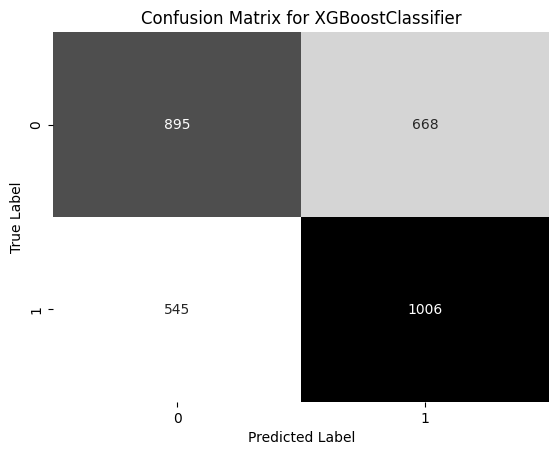

In [22]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for XGBoostClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [23]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for XGBoostClassifier:')
print(classification_rep)



Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.62      0.57      0.60      1563
           1       0.60      0.65      0.62      1551

    accuracy                           0.61      3114
   macro avg       0.61      0.61      0.61      3114
weighted avg       0.61      0.61      0.61      3114



#### Applying XGBoost on PCA Components of Balanced SMOTE_TOMEK Data

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

smote=SMOTE()
smote_enn = SMOTEENN(random_state=42, sampling_strategy = 'not majority')
smote_tomek = SMOTETomek()


In [25]:

smote_X, smote_y = smote_tomek.fit_resample(X,y)

scaler = StandardScaler()
X_scaled= scaler.fit_transform(smote_X)

pca = PCA(5)

# Apply PCA to the data, transforming it to a new space of principal components
# 'x' should be your feature matrix (2D array or DataFrame)
pca_data = pca.fit_transform(X_scaled)

# Create a DataFrame to store the transformed data (principal components)
# Each column corresponds to a principal component (e.g., Principal Component 1, Principal Component 2, etc.)
pca_df = pd.DataFrame(pca_data, columns=[f'Principal Component {i+1}' for i in range(pca_data.shape[1])])


In [26]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, smote_y, test_size=0.2, random_state=42)


In [27]:
xg = XGBClassifier(n_estimators=500, max_depth=3)
xg.fit(X_train_pca, y_train_pca)
y_pred_pca = xg.predict(X_test_pca)
score = accuracy_score(y_test_pca, y_pred_pca)
print("Score is "+ str(score))


matrix = confusion_matrix(y_test_pca, y_pred_pca)
print(matrix)
score = accuracy_score(y_test_pca, y_pred_pca)
print(score)


Score is 0.5570101351351351
[[666 485]
 [564 653]]
0.5570101351351351


#### Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Inicializar o modelo Naive Bayes
nb_model = GaussianNB( var_smoothing = np.float64(1.0), priors= None)

# Treinar o modelo com os dados de treino
nb_model.fit(X_train_scaled, y_train)

# Fazer previsões com os dados de teste
y_pred_nb = nb_model.predict(X_test_scaled)

# Calcular o score da predição de validação
nb_score = accuracy_score(y_test, y_pred_nb)
print("Score da predição de validação:", nb_score)



Score da predição de validação: 0.5446371226718048


In [ ]:
# Calcular a matriz de confusão
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)
print("Matriz de Confusão:")
print(nb_conf_matrix)

#### GridSearch

In [31]:
initialModel = GaussianNB()


#Define the hyperparameter grid for grid search 
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100),
    'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]]
}
# Inicializar o GridSearchCV com o modelo XGBClassifier e a grade de parâmetros
grid_search = GridSearchCV(estimator=initialModel, param_grid=param_grid, scoring=['roc_auc', 'f1'], refit='roc_auc', cv=10, n_jobs=-1)

# Executar o GridSearchCV com os dados balanceados
grid_search.fit(X_blc, y_blc)

# Exibir os melhores parâmetros e a melhor pontuação
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor pontuação (roc_auc):", grid_search.best_score_)
print("Melhor pontuação (f1):", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])

Melhores parâmetros encontrados: {'priors': None, 'var_smoothing': np.float64(1.0)}
Melhor pontuação (roc_auc): 0.5817511292134172
Melhor pontuação (f1): 0.36750386141436847


### Teste Pipelines

#### Pipeline 1

In [71]:
X2 = X[['renda_extra', 'meses_no_trabalho', 'possui_telefone_residencial', 'ocupacao']]
y2 = y.copy()
print(X2.head())

   renda_extra  meses_no_trabalho  possui_telefone_residencial  ocupacao
0            0                  0                            1         1
1            0                  0                            1         5
3            0                  0                            1         2
4          600                  0                            1         5
5            0                  0                            1         2


In [76]:
X2['renda_extra'].value_counts()


renda_extra
0       14663
350       124
600        54
200        49
400        46
        ...  
594         1
815         1
3           1
1192        1
848         1
Name: count, Length: 252, dtype: int64

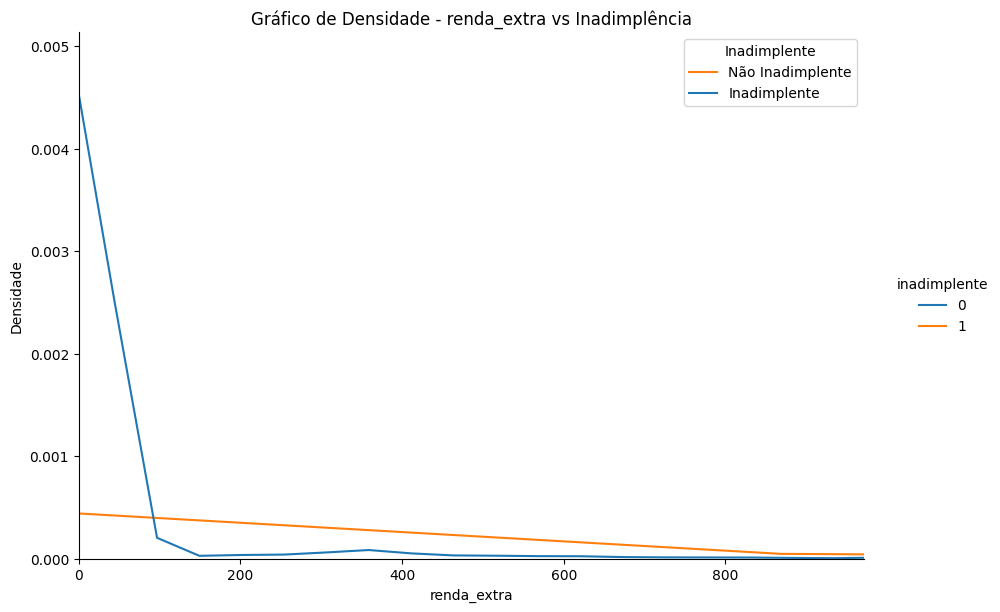

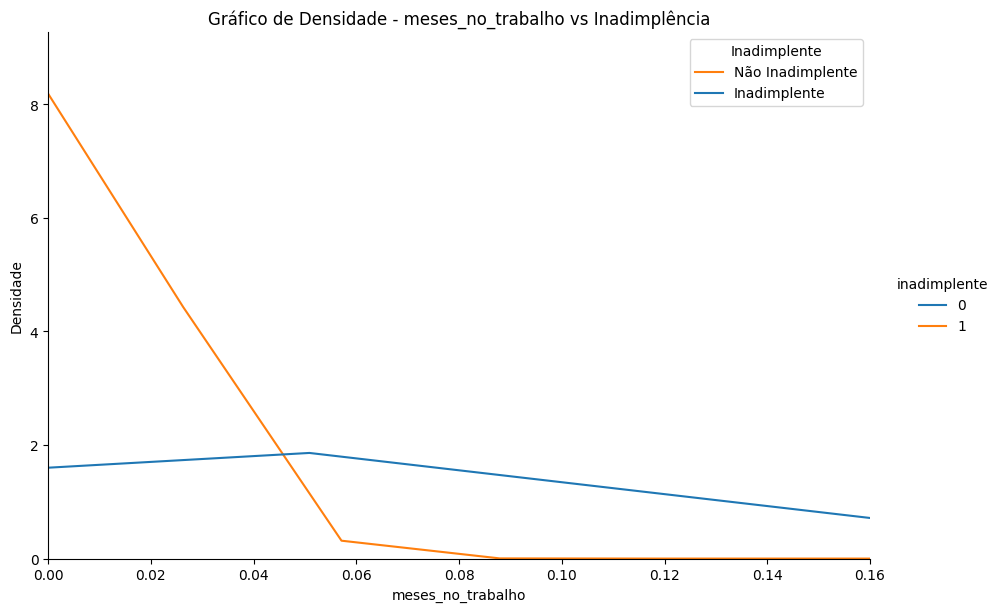

In [79]:
# Plotar gráfico de densidade para cada atributo de X2_no_outliers em relação à inadimplência
for column in ['renda_extra','meses_no_trabalho']:

    sns.displot(data=X2, x=column, hue=y2, kind="kde", height=6, aspect=1.5)
    plt.title(f'Gráfico de Densidade - {column} vs Inadimplência')
    plt.xlabel(column)
    plt.ylabel('Densidade')
    plt.legend(title='Inadimplente', labels=['Não Inadimplente', 'Inadimplente'])
    plt.xlim(0, X2[column].max() * 0.005)
    plt.show()

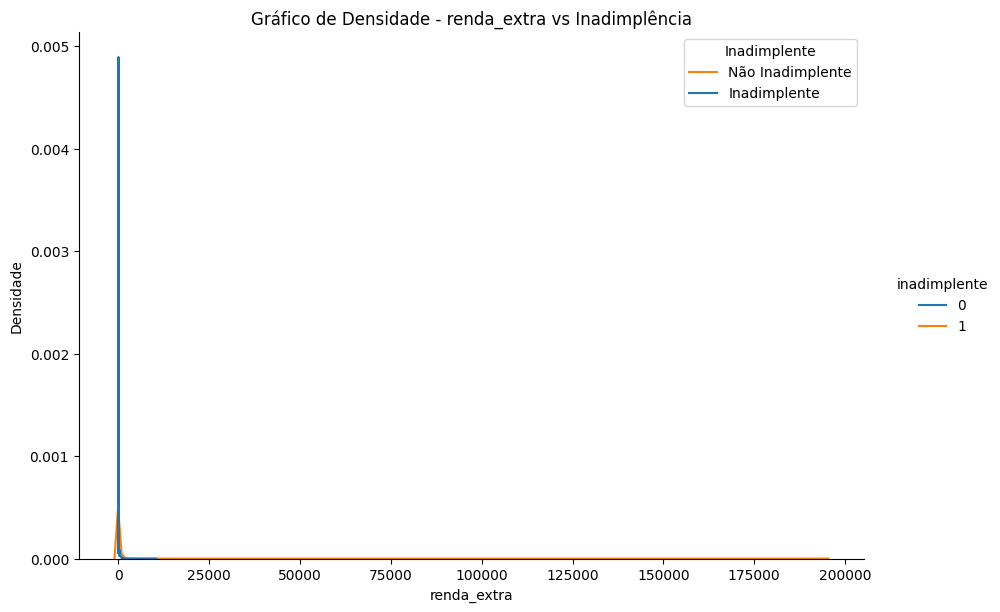

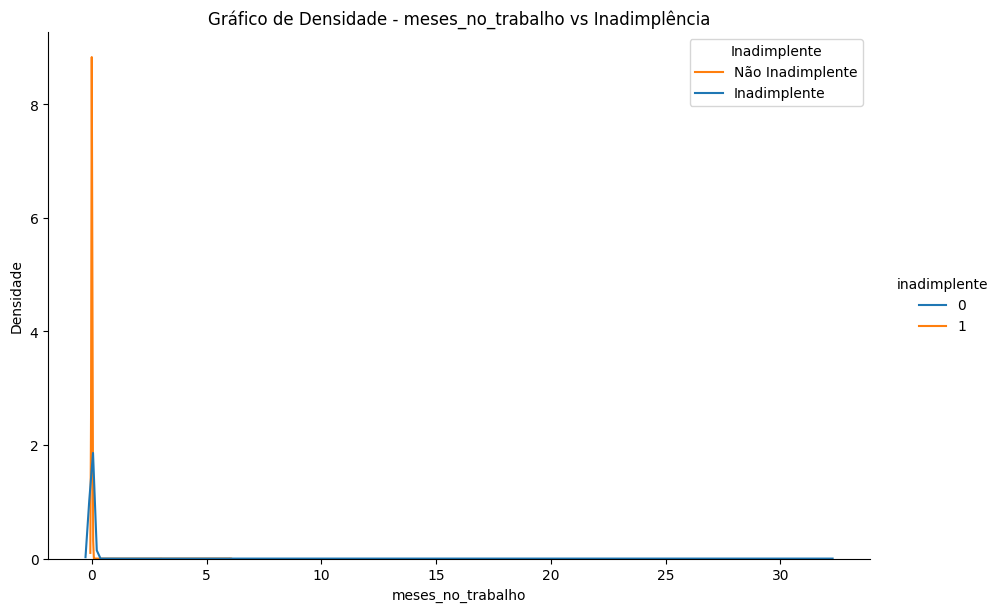

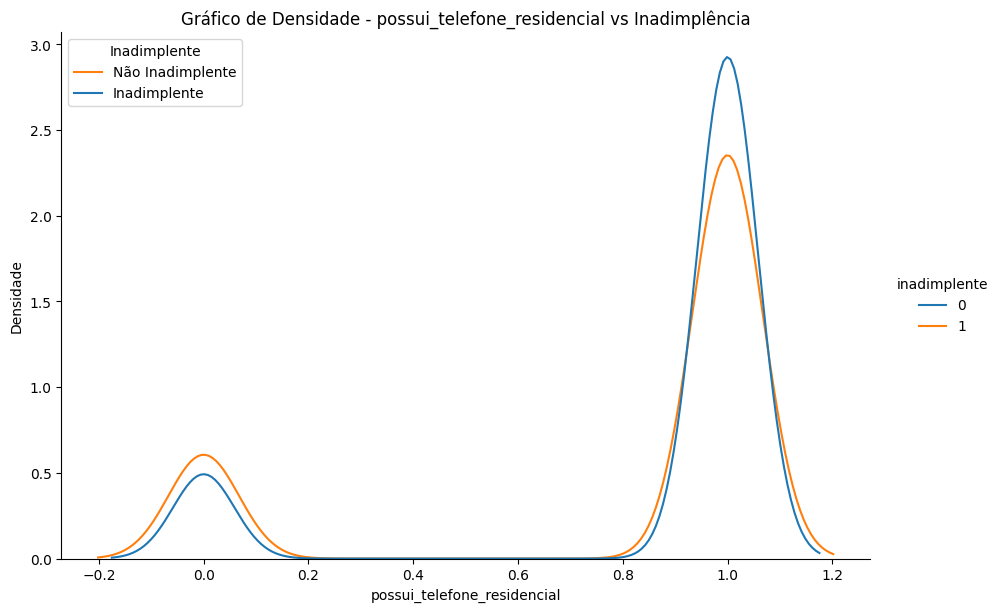

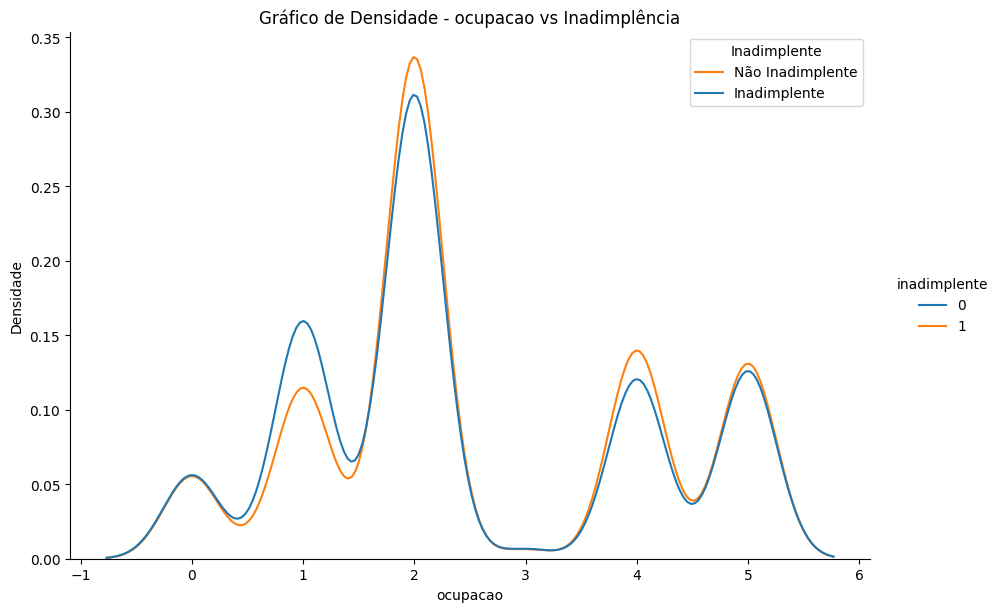

In [73]:
# Plotar gráfico de densidade para cada atributo de X2_no_outliers em relação à inadimplência
for column in X2.columns:

    sns.displot(data=X2, x=column, hue=y2, kind="kde", height=6, aspect=1.5)
    plt.title(f'Gráfico de Densidade - {column} vs Inadimplência')
    plt.xlabel(column)
    plt.ylabel('Densidade')
    plt.legend(title='Inadimplente', labels=['Não Inadimplente', 'Inadimplente'])
    plt.show()

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bestXgbModel = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=850, n_jobs=None,
              num_parallel_tree=None, random_state=None)


# Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                 # Escalonar os dados
    ('poly', PolynomialFeatures(degree=2)),      # Gerar interações não lineares
    ('pca', PCA(n_components=10)),                # Reduzir dimensionalidade
    ('clf', bestXgbModel)            # Classificador
])

# Ajuste e avaliação
pipeline.fit(X_train, y_train)
print("Acurácia no teste:", pipeline.score(X_test, y_test))

Acurácia no teste: 0.5260115606936416


In [ ]:
X_train_scaled['dia_vencimento']

array([[-0.28045994, -0.45084987,  0.9803593 , ...,  1.62252052,
         0.88493984,  0.88493984],
       [-0.28045994,  0.29174182, -2.4319925 , ..., -0.34039149,
        -0.01868156, -0.01868156],
       [-0.28045994,  1.77692521,  0.9803593 , ...,  0.96821651,
         0.91178008,  0.91178008],
       ...,
       [-0.28045994, -0.45084987, -0.7258166 , ..., -0.99469549,
        -0.09472891, -0.09472891],
       [-0.28045994,  0.29174182,  0.9803593 , ...,  1.62252052,
        -0.60469346, -0.60469346],
       [-0.28045994,  0.29174182, -0.7258166 , ...,  0.96821651,
         0.44207589,  0.44207589]])

C:\Users\abraa\AppData\Local\Temp\ipykernel_16888\1438309711.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[df_train['inadimplente'] == 0]['dia_vencimento_cubico'], label='Não Inadimplente', shade=True)
C:\Users\abraa\AppData\Local\Temp\ipykernel_16888\1438309711.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[df_train['inadimplente'] == 1]['dia_vencimento_cubico'], label='Inadimplente', shade=True)


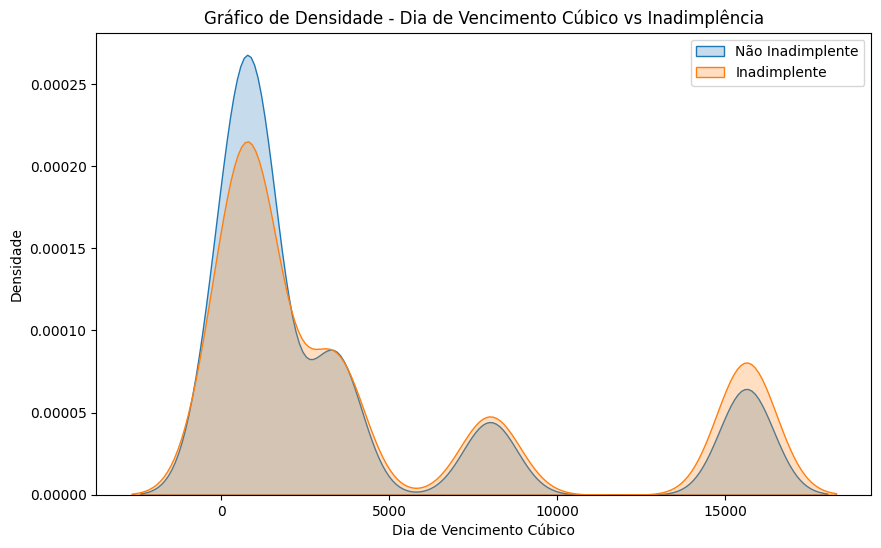

In [ ]:
# Plotar gráfico de densidade para a coluna dia_vencimento em relação à inadimplência
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train[df_train['inadimplente'] == 0]['dia_vencimento'], label='Não Inadimplente', shade=True)
sns.kdeplot(df_train[df_train['inadimplente'] == 1]['dia_vencimento'], label='Inadimplente', shade=True)
plt.title('Gráfico de Densidade - Dia de Vencimento vs Inadimplência')
plt.xlabel('Dia de Vencimento')
plt.ylabel('Densidade')
plt.legend()
plt.show()